## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-05-21 05:11:41--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.126.139, 74.125.126.113, 74.125.126.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.126.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-05-21 05:11:41--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  --

In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
print(data_df.dtypes)
data_df['date'] = data_df['date'].str.replace('T000000','')
data_df['date'] = data_df['date'].astype(int)                                      # Remove T000000 part from data column. Hint: search about .str.replace() method. :)

data_array = data_df.drop(['id'], axis=1)                                              # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

print(data_array.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living

Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:
mean = data_array.mean()                                  # this should be an array, each entry should be mean of a column
sd = data_array.std()                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
labels = data_array['price']                                                                                                            # extract the price column from data


x_array_norm = np.delete(data_array_norm,1 ,1)                                                                                                      # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_pred-y_true)**2)                      # fill code here

  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a)+b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  xT=np.transpose(x)
  print(xT.shape)
  print(yp.shape)
  da = np.dot(xT,(((2)/m)*(yp-y_true)))              # write code to calculate derivative of loss with respect to a
  db = ((2)/m)*np.sum(yp-y_true)              # write code to calculate derivative of loss with respect to b
  print(da.shape)
  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  print(x.shape)
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros([n,],dtype=float)                                       # initialize a- weights and b- bias
  b = np.zeros([m,],dtype=float)

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    y_pred= y(x,a,b)
    dA,dB=gradient(x,a,b,y_true)
    a=a-learning_rate*dA
    b=b-learning_rate*dB
    l_mse = loss(y_pred,y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [ ]:
epochs = 10              # tweak this!!!
learn_rate = 0.01          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

(18371, 19)
(19, 18371)
(18371,)
(19,)
Epoch  1  Completed! loss =  421333293468.0863
(19, 18371)
(18371,)
(19,)
Epoch  2  Completed! loss =  397185962226.4366
(19, 18371)
(18371,)
(19,)
Epoch  3  Completed! loss =  375665446993.2914
(19, 18371)
(18371,)
(19,)
Epoch  4  Completed! loss =  356348977931.93036
(19, 18371)
(18371,)
(19,)
Epoch  5  Completed! loss =  338892483631.1525
(19, 18371)
(18371,)
(19,)
Epoch  6  Completed! loss =  323015325717.2805
(19, 18371)
(18371,)
(19,)
Epoch  7  Completed! loss =  308488029532.3108
(19, 18371)
(18371,)
(19,)
Epoch  8  Completed! loss =  295122420645.2685
(19, 18371)
(18371,)
(19,)
Epoch  9  Completed! loss =  282763693398.07245
(19, 18371)
(18371,)
(19,)
Epoch  10  Completed! loss =  271284031140.5494
Training completed!!


In [ ]:
def dot_product(a, b):
  """Calculates the dot product of two tuples.

  Args:
    a: A tuple.
    b: A tuple.

  Returns:
    The dot product of a and b.
  """

  return sum(a[i] * b[i] for i in range(len(a)))


a = (1, 2, 3)
b = (4, 5, 6)

print(dot_product(a, b))

32


### **Evaluation and Visualization**
Lets plot how loss varies with epochs


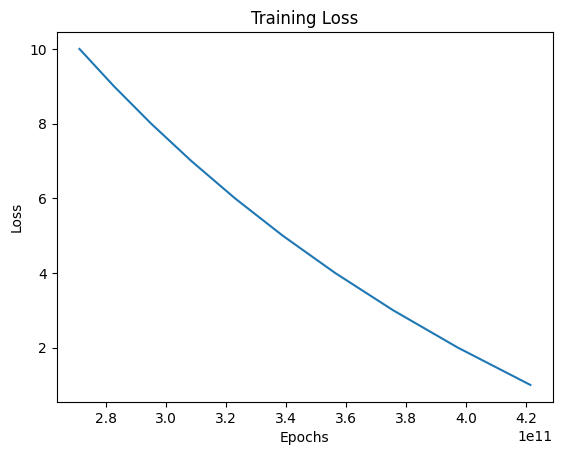

In [ ]:
# test_loss = loss(y(x_test,a,b),y_test)

# print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(train_loss ,range(1, epochs + 1))                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 4       5       5       4       8       

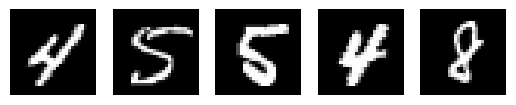

(60000,)


In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()
print(y_train.shape)

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], -1)                                       # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], -1)                                         # flatten th eimages of test set
print(x_train_flatten.shape)
print(x_test.shape)

# Divide the training data into training and validation data....

n_validation = 10000
x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]



# Take the last parxt
x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]
print(x_train_flatten.shape)
print(x_validation.shape)
print(y_train.shape)



(60000, 784)
(10000, 28, 28)
(50000, 784)
(10000, 784)
(50000,)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential([
    keras.Input(shape=(784,)),
                layers.Dense(units=500, activation = 'relu', name = "Relu1"),
                layers.Dense(units=250, activation = 'relu',   name = "Relu2"),
                layers.Dense(units=100, activation = 'relu', name = "Relu3"),
                layers.Dense(units=10, activation = 'softmax', name = "SOFTMAX")
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Relu1 (Dense)               (None, 500)               392500    
                                                                 
 Relu2 (Dense)               (None, 250)               125250    
                                                                 
 Relu3 (Dense)               (None, 100)               25100     
                                                                 
 SOFTMAX (Dense)             (None, 10)                1010      
                                                                 
Total params: 543860 (2.07 MB)
Trainable params: 543860 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

n_epochs = 28              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten,y_train,validation_data=(x_validation, y_validation),
    epochs=n_epochs)

Epoch 1/28
1563/1563 [==============================] - 17s 10ms/step - loss: 0.0772 - accuracy: 0.9887 - val_loss: 0.2913 - val_accuracy: 0.9707
Epoch 2/28
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0911 - accuracy: 0.9867 - val_loss: 0.3608 - val_accuracy: 0.9613
Epoch 3/28
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0414 - accuracy: 0.9917 - val_loss: 0.2477 - val_accuracy: 0.9743
Epoch 4/28
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0372 - accuracy: 0.9925 - val_loss: 0.3590 - val_accuracy: 0.9720
Epoch 5/28
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0605 - accuracy: 0.9890 - val_loss: 0.2735 - val_accuracy: 0.9734
Epoch 6/28
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0470 - accuracy: 0.9911 - val_loss: 0.2111 - val_accuracy: 0.9746
Epoch 7/28
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0547 - accuracy: 0.9922 - val_loss: 0.2544 -

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 [==============================] - 1s 3ms/step - loss: 0.5421 - accuracy: 0.9663
Loss =  0.5420830845832825
Accuracy =  96.63000106811523 %


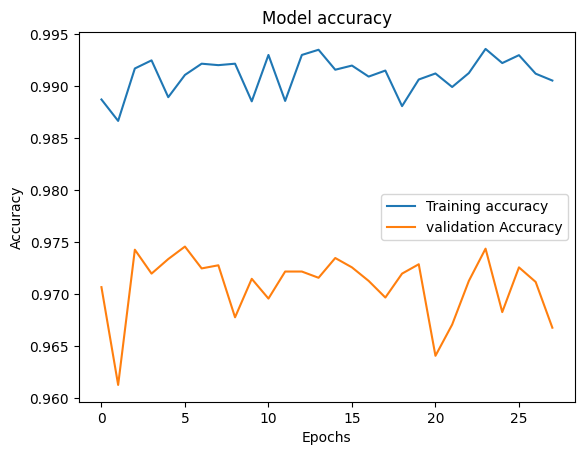

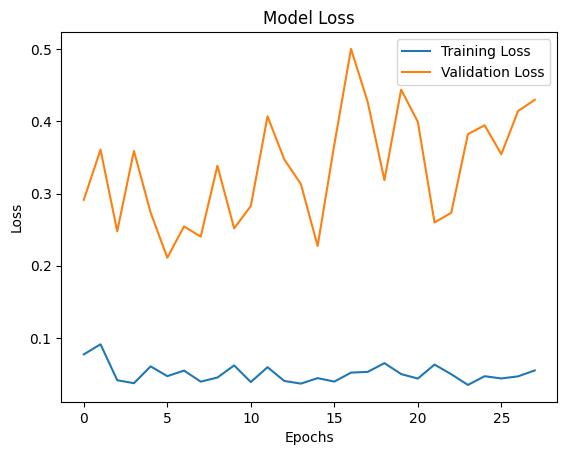

In [ ]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
5       9       0       6       0       6       0       8       0       5       5       0       6       0       3       7       8       7       2       1       

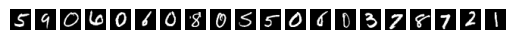

Predicted value: 
1/1 [==============================] - 0s 22ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 21ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 22ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 23ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 22ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 23ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 21ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 22ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 24ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 20ms/step
[5 9 0 6 0 0 0 8 0 5 5 0 6 0 3 7 8 7 2 1]
1/1 [==============================] - 0s 

In [ ]:
n = 20   # = no. of images to see predictions on

index = np.random.choice(x_test_flatten.shape[0],n)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind].reshape(28, 28), cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    scores = model.predict(x_test_flatten[index])
    predicted_digits = np.argmax(scores, axis=1)
    print(predicted_digits)